In [ ]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from earlystop import EarlyStopper
from lstm_models import AirModel, StackLSTM, AirModel_DropOut, AirModelLayers


#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

sns.set_style("darkgrid")


import numpy as np
import random
import os, errno
from tqdm import tqdm


np.random.seed(seed=77)

In [ ]:
#fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file7_080124.mat"
cutoff = [8/1000, 11/1000]

mat = ds.MatFileToDataFrame(fpath, fname)

df_ = mat.get_dataframe(cutoff)

x = dc.CaractDefect(df_)
taus = x.get_tau()[1]

hilbert, _ = x.get_hilbert()

df = pd.merge(df_, hilbert, on = 'Hilbert Transform', how = 'outer')

df.head()

## **prophet dataset**

In [45]:
df.index = pd.to_datetime(df.index, unit='ms')
x = df.Amplitude[300:30000].values
####
ds = df.index[300:30000].values[::2]
subset = pd.DataFrame()
subset['ds'] = ds
subset['y'] = utils.subsample(x, 2)
subset.head()

,ds,y
0,1970-01-01 00:00:00.300,0.000142
1,1970-01-01 00:00:00.302,0.000116
2,1970-01-01 00:00:00.304,0.000096
3,1970-01-01 00:00:00.306,0.000090
4,1970-01-01 00:00:00.308,0.000099


In [46]:
# prophet
from prophet import Prophet

m = Prophet()
m.fit(subset)

15:10:23 - cmdstanpy - INFO - Chain [1] start processing
15:10:28 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
future = m.make_future_dataframe(periods = 100, freq = 'ms')
future.tail()


,ds
14945,1970-01-01 00:00:30.094
14946,1970-01-01 00:00:30.095
14947,1970-01-01 00:00:30.096
14948,1970-01-01 00:00:30.097
14949,1970-01-01 00:00:30.098


In [48]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
14945,1970-01-01 00:00:30.094,0.000603,-0.000004,0.001180
14946,1970-01-01 00:00:30.095,0.000603,0.000083,0.001209
14947,1970-01-01 00:00:30.096,0.000603,0.000033,0.001190
14948,1970-01-01 00:00:30.097,0.000603,0.000041,0.001212
14949,1970-01-01 00:00:30.098,0.000603,0.000038,0.001229


/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



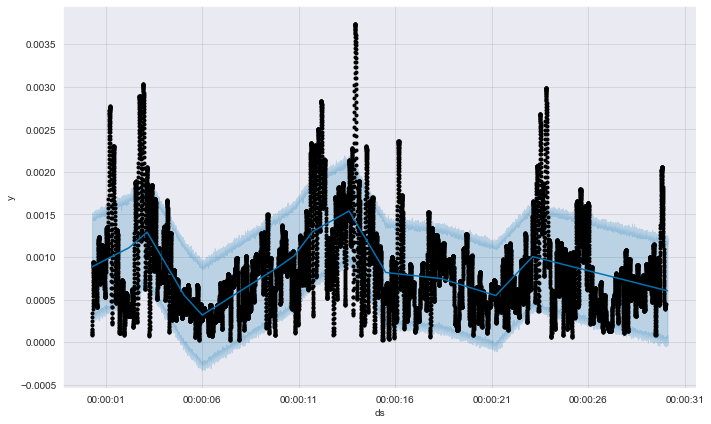

In [49]:
fig1 = m.plot(forecast)

/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



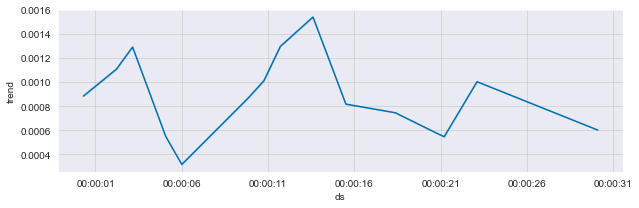

In [50]:
fig2 = m.plot_components(forecast)

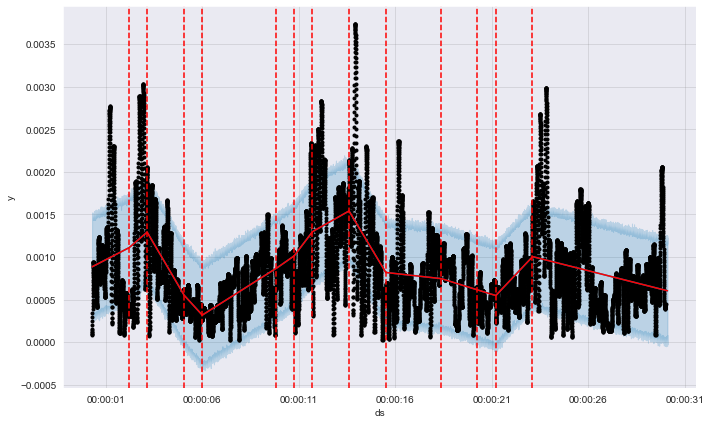

In [51]:
from prophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)